In [1]:
import pandas as pd #Using Pandas for DataFrame
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Create 3D plot
from sklearn.cluster import KMeans #Import learning algorithm

# Simple KMeans cluster analysis on breast cancer data using Python, SKLearn, Numpy, and Pandas
# Created for ICS 491 (Big Data) at University of Hawaii at Manoa, Fall 2017
# Questions? Tweet me at https://twitter.com/spyhi

# Import breast cancer data using Pandas. Should load if it's in the same folder as Python script.
# Total about 570 samples.
# I got my data from Kaggle at the following URL:
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
address="C:/Users/ANTHONY/Desktop/CSV&XLSX/breast_cancer.csv"
data = pd.read_csv(address)
data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [2]:
# Was originally going to use all these feature columns
# but decided to test on a small amount to visualize and ended up being happy with results
feat_cols = ["radius_mean", "texture_mean", "texture_mean", "area_mean", \
                      "smoothness_mean", "compactness_mean", "concavity_mean", \
                      "symmetry_mean", "fractal_dimension_mean"]

# Actual features used, based on previous knowledge of skin cancer diagnosis factors
feat_cols_sm = ["radius_mean", "concavity_mean", "symmetry_mean"]

# Use Pandas dataframe query to populate Numpy array with feature vectors.
features = np.array(data[feat_cols_sm])

features  #########333 its the dataframe that has been converted into array

array([[17.99   ,  0.3001 ,  0.2419 ],
       [20.57   ,  0.0869 ,  0.1812 ],
       [19.69   ,  0.1974 ,  0.2069 ],
       ...,
       [16.6    ,  0.09251,  0.159  ],
       [20.6    ,  0.3514 ,  0.2397 ],
       [ 7.76   ,  0.     ,  0.1587 ]])

In [3]:
# Initialize the KMeans cluster module. Setting it to find two clusters, hoping to find malignant vs benign.
km = KMeans(n_clusters=2, max_iter=300)

# Fit model to our selected features.
km.fit(features)

# Put centroids and results into variables.
centroids = km.cluster_centers_
labels = km.labels_

# Sanity check
print(centroids)
print(labels)



[[12.44571194  0.06207506  0.17827541]
 [19.18387324  0.16916028  0.18984155]]
[1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 

In [7]:
colors[labels[0]],colors[labels[3]]

('b', 'r')

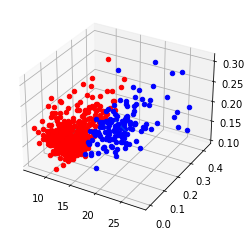

In [4]:
# Create new MatPlotLib figure
fig = plt.figure()
# Add 3rd dimension to figure
ax = fig.add_subplot(111, projection='3d')
# This means "red" and "blue"
colors = ["r", "b"]

# Plot all the features and assign color based on cluster identity label
for i in range(len(features)):
    ax.scatter(xs=features[i][0], ys=features[i][1], zs=features[i][2],
               c=colors[labels[i]], zdir='z')

# Plot centroids, though you can't really see them.
ax.scatter(xs=centroids[:,0], ys=centroids[:,1], zs=centroids[:,2],
           marker="x", s=150, c="c")




Percent matched between benign and malignant  85.58875219683657


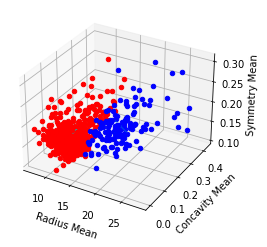

In [11]:
# Create new MatPlotLib figure
fig = plt.figure()
# Add 3rd dimension to figure
ax = fig.add_subplot(111, projection='3d')
# This means "red" and "blue"
colors = ["r", "b"]

# Plot all the features and assign color based on cluster identity label
for i in range(len(features)):
    ax.scatter(xs=features[i][0], ys=features[i][1], zs=features[i][2],
               c=colors[labels[i]], zdir='z')

# Plot centroids, though you can't really see them.
ax.scatter(xs=centroids[:,0], ys=centroids[:,1], zs=centroids[:,2],
           marker="x", s=150, c="c")



# Create array of diagnosis data, which should be same length as labels.
diag = np.array(data['diagnosis'])
# Create variable to hold matches in order to get percentage accuracy.
matches = 0

# Transform diagnosis vector from B||M to 0||1 and matches++ if correct.
for i in range(0, len(diag)):
    if diag[i] == "B":
        diag[i] = 0
    if diag[i] == "M":
        diag[i] = 1
    if diag[i] == labels[i]:
        matches = matches + 1

#Calculate percentage matches and print.
percentMatch = (matches/len(diag))*100
print("Percent matched between benign and malignant ", percentMatch)

#Set labels on figure and show 3D scatter plot to visualize data and clusters.
ax.set_xlabel("Radius Mean")
ax.set_ylabel("Concavity Mean")
ax.set_zlabel("Symmetry Mean")
plt.show()